Importing necessary libraries and dependancies

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from google.colab import drive
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
!pip install lightgbm
import lightgbm as lg
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
gpus=tf.config.experimental.list_physical_devices('GPU')
for i in gpus:
  tf.config.experimental.set_memory_growth(i,True)

In [3]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
data=pd.read_csv('/content/gdrive/MyDrive/spotify dataset/data/data.csv')

In [5]:
data.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


In [6]:
data.drop_duplicates(inplace=True,subset=['name']) #so that a song is counted only once while grouping into types.

Implement a K-means Clustering Algorithm to group the song based on various factors into 4 groups so as to suggest to a user based on their moods.

In [7]:
data.columns #recommending based on valence,acousticness,danceability,energy,popularity,tempo
name=data['name']

<Axes: xlabel='acousticness', ylabel='popularity'>

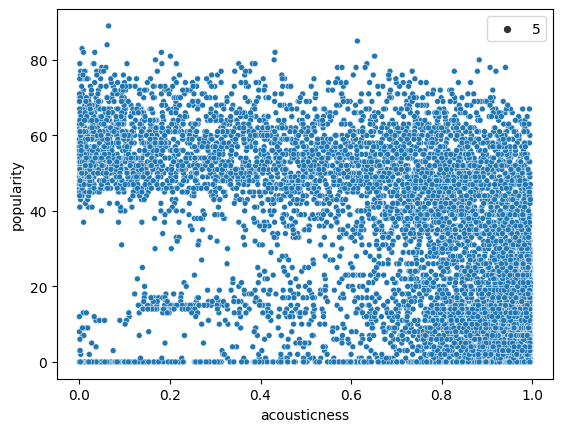

In [8]:
sns.scatterplot(data=data,x=data['acousticness'].head(10000),y=data['popularity'].head(10000),size=5)

<Axes: xlabel='energy', ylabel='popularity'>

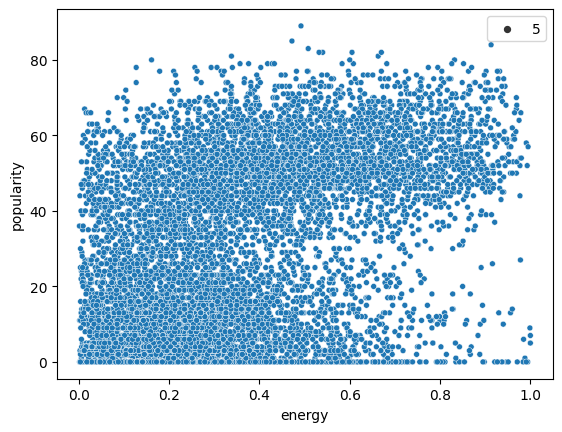

In [9]:
sns.scatterplot(data=data,x=data['energy'].head(10000),y=data['popularity'].head(10000),size=5)

In [23]:
features=['valence','acousticness','danceability','energy','popularity','tempo','instrumentalness'];
F=MinMaxScaler().fit_transform(data[features]) #perform feature scaling so as to normalize all the values to have a value between 0 and 1
                                                #this is used to ensure all the features have a consistent scaling
kmeans = KMeans(init="k-means++",
                n_clusters=4,
                random_state=15).fit(F)
data['kmeans'] = kmeans.labels_
data['song name']=name


cluster=data.groupby(by=data['kmeans'])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [12]:
data

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,...,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,kmeans,song name
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.21100,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,...,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954,2,"Piano Concerto No. 3 in D Minor, Op. 30: III. ..."
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.34100,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,...,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936,0,Clancy Lowered the Boom
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.16600,0,1o6I8BglA6ylDMrIELygv1,0.913000,...,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339,2,Gati Bali
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.30900,0,3ftBPsC5vPBKxYSee08FDH,0.000028,...,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109,0,Danny Boy
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.19300,0,4d6HGyGT8e121BsdKmw9v6,0.000002,...,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665,0,When Irish Eyes Are Smiling
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170646,0.5220,2020,0.204,['Gunna'],0.598,230600,0.47200,1,2f8y4CuG57UJEmkG3ujd0D,0.000015,...,0.108,-10.991,1,NASTY GIRL / ON CAMERA,66,2020-05-22,0.2580,120.080,3,NASTY GIRL / ON CAMERA
170647,0.0838,2020,0.974,['Najma Wallin'],0.175,133500,0.00759,0,6RuFOroO9VO0aMGEzirLHk,0.925000,...,0.113,-35.072,1,Med slutna ögon,70,2020-02-21,0.0454,70.872,2,Med slutna ögon
170649,0.7340,2020,0.206,['Ashnikko'],0.717,150654,0.75300,0,0OStKKAuXlxA0fMH54Qs6E,0.000000,...,0.101,-6.020,1,Halloweenie III: Seven Days,68,2020-10-23,0.0605,137.936,1,Halloweenie III: Seven Days
170650,0.6370,2020,0.101,['MAMAMOO'],0.634,211280,0.85800,0,4BZXVFYCb76Q0Klojq4piV,0.000009,...,0.258,-2.226,0,AYA,76,2020-11-03,0.0809,91.688,1,AYA


In [25]:
y=data.pop('kmeans')
x=data.drop(columns=['name','artists','id','release_date','song name'])

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35)

In [ ]:
error_rates = []
for i in np.arange(1, 101):

    new_model = KNeighborsClassifier(n_neighbors = i)

    new_model.fit(x_train,y_train)

    new_predictions = new_model.predict(x_test)

    error_rates.append(np.mean(new_predictions != y_test))


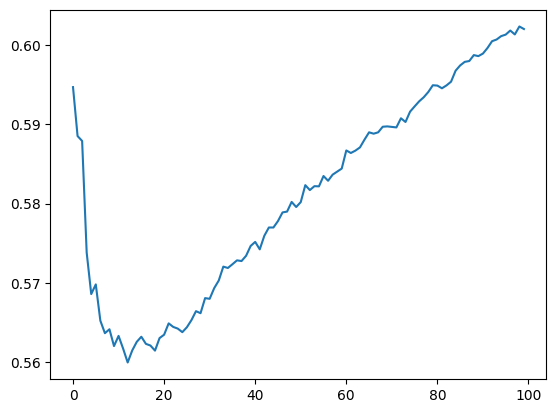

In [ ]:
plt.plot(error_rates)

In [40]:
model = KNeighborsClassifier(n_neighbors = 15)
model.fit(x_train, y_train)
predictions = model.predict(x_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.51      0.63      0.56     15824
           1       0.40      0.49      0.44     13366
           2       0.36      0.12      0.18      6969
           3       0.40      0.32      0.35     10615

    accuracy                           0.44     46774
   macro avg       0.42      0.39      0.39     46774
weighted avg       0.43      0.44      0.42     46774



Since this is not at all satisfactory we must look at alternate models , such as XGBoost or Random Forests , so as to help in our classification task.

In [18]:
from lightgbm import LGBMClassifier
model=LGBMClassifier().fit(x_train,y_train)

In [19]:
model.score(x_train,y_train)

0.9998388285135384

In [20]:
model.score(x_test,y_test)

0.989780647368196

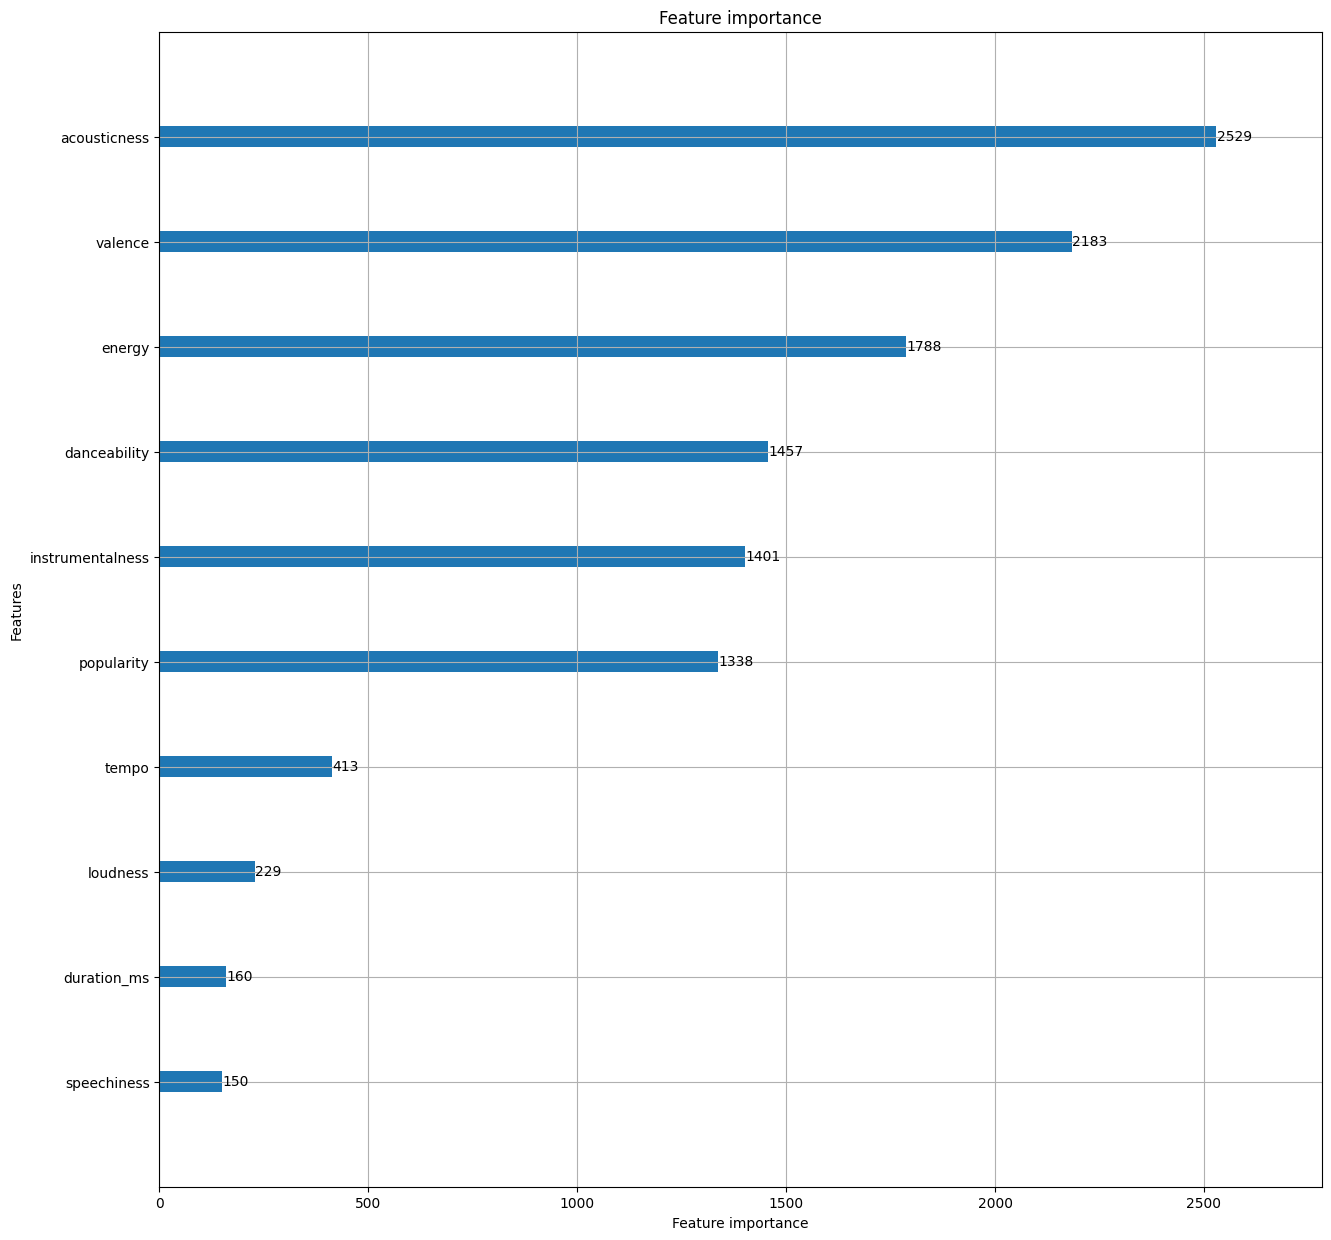

In [21]:
ax = lg.plot_importance(model, max_num_features=10, figsize=(15,15))
plt.show()

In [26]:
df=cluster.apply(lambda x: x.sort_values(["popularity"],ascending=False))
df.reset_index(level=0, inplace=True)

In [44]:
df

,kmeans,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,...,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,song name
19623,0,0.0799,2020,0.786000,['Tate McRae'],0.642,169266,0.374,0,45bE4HXI0AwGZXfZtMp8JR,...,4,0.0906,-9.386,1,you broke me first,95,2020-04-17,0.0545,124.099,you broke me first
19620,0,0.0927,2020,0.864000,"['Justin Bieber', 'benny blanco']",0.631,149297,0.239,1,4y4spB9m0Q6026KfkAvy9Q,...,11,0.1160,-7.071,0,Lonely (with benny blanco),95,2020-10-16,0.0398,79.859,Lonely (with benny blanco)
19413,0,0.4460,2019,0.751000,['Lewis Capaldi'],0.501,182161,0.405,0,7qEHsqek33rTcFNT9PFqLf,...,1,0.1050,-5.679,1,Someone You Loved,91,2019-05-17,0.0319,109.891,Someone You Loved
19645,0,0.3480,2020,0.731000,"['Powfu', 'beabadoobee']",0.726,173333,0.431,0,7eJMfftS33KTjuF7lTsMCx,...,8,0.6960,-8.765,0,death bed (coffee for your head),90,2020-02-08,0.1350,144.026,death bed (coffee for your head)
19210,0,0.1200,2018,0.934000,"['Billie Eilish', 'Khalid']",0.351,200186,0.296,0,0u2P5u6lvoDfwTYjAADbn4,...,4,0.0950,-10.109,0,lovely (with Khalid),89,2018-04-19,0.0333,115.284,lovely (with Khalid)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124544,3,0.2490,2019,0.000032,['Coordak'],0.458,215171,0.933,0,2ytnGi1p2SvgFYIc0H20sV,...,2,0.0810,-5.091,1,Captain,0,2019-01-01,0.0927,144.968,Captain
124538,3,0.4240,2019,0.138000,['Mass Digital'],0.883,304421,0.503,0,1ZXg3gFfqdgOurRQl6MNrl,...,9,0.0769,-9.722,0,Crossroads - Original Mix,0,2019-07-26,0.2170,121.993,Crossroads - Original Mix
124537,3,0.1340,2019,0.000364,['Funk Truck'],0.659,368137,0.917,0,1N02hv3aUc9H7AAvrxkUa6,...,7,0.5220,-6.526,1,Triceratops,0,2019-08-10,0.0442,133.015,Triceratops
124536,3,0.2200,2019,0.076200,"['Endymion', 'Bass Chaserz']",0.341,237818,0.994,0,0uqWsfvC6gz7L0BuGajUuv,...,1,0.3520,0.060,0,Payback - Bass Chaserz Remix,0,2019-12-23,0.3740,157.607,Payback - Bass Chaserz Remix
